In [88]:
import pandas as pd
import numpy as np
import seaborn as sb

In [89]:
df = pd.read_csv("nonregdataex1.csv")

In [90]:
df.head()

A  B  C  D  Target
0  60 -5  5  2   -3109
1  44 -3  1  3    1401
2  36 -3  4  3     -48
3  43 -4  5  3    -658
4  32 -5  6  3   -3288

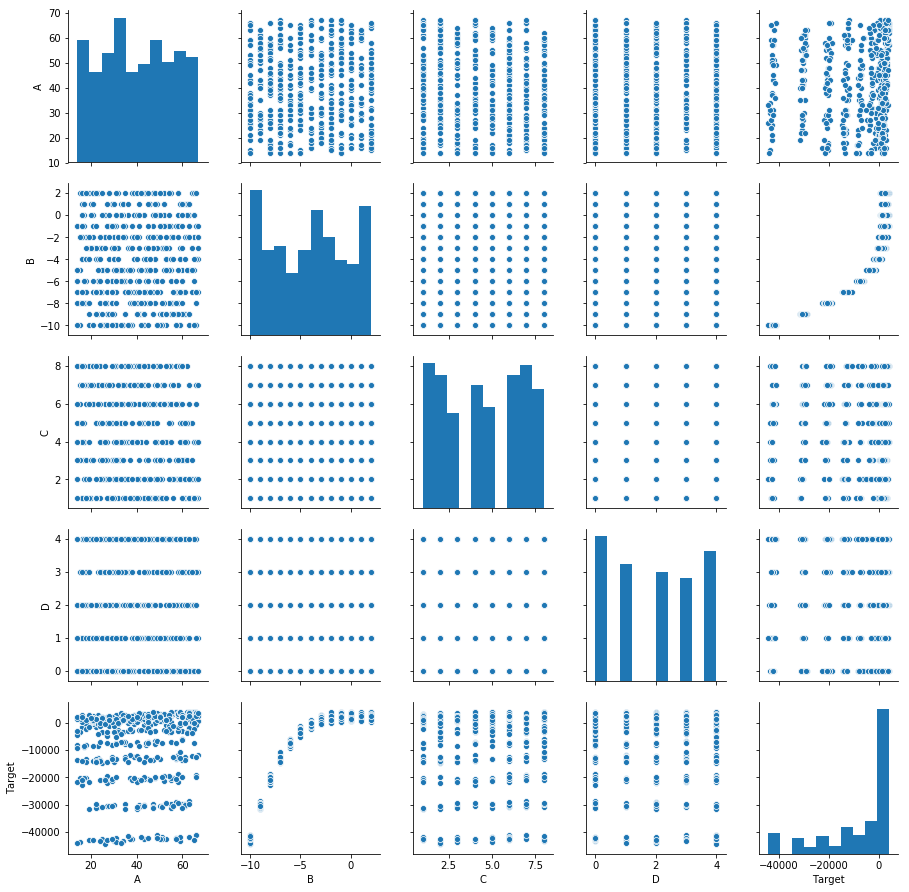

In [91]:
sb.pairplot(df)

In [92]:
import sklearn.linear_model as skl

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
model = skl.LinearRegression()

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Target'],axis=1), df['Target'], test_size=0.33, random_state=42)

In [96]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [97]:
pred = model.predict(X_test)

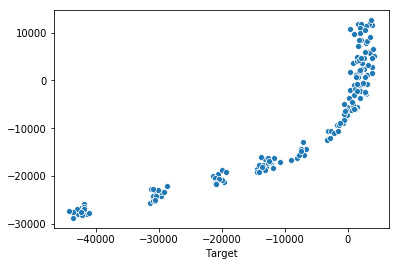

In [98]:
sb.scatterplot(y_test,pred)

In [99]:
model.score(X_test,y_test)

0.7743904059592976

In [115]:
from sklearn.preprocessing import PolynomialFeatures
# the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [116]:
samp = np.array([2,3,4]).reshape(-1,1)
cubic = PolynomialFeatures(degree=2)
cubic.fit_transform(samp)

array([[ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.]])

In [117]:
samp = np.array([[2,3],[4,5]])
cubic.fit_transform(samp)

array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [118]:
X = df[['A','B','C','D']]
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(X)

In [119]:
X_cubic.shape

(500, 35)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_cubic, df['Target'], test_size=0.33, random_state=42)

In [121]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
model.score(X_test,y_test)

0.9881796063107972

In [123]:
pred = model.predict(X_test)

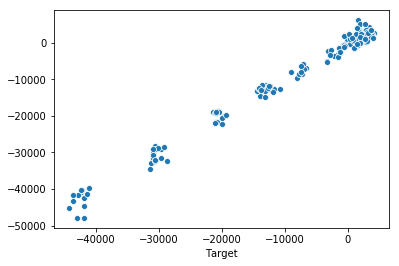

In [124]:
sb.scatterplot(y_test,pred)